In [1]:
#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

import chromedriver_autoinstaller
import selenium
from selenium.webdriver.common.by import By
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 검색어
query_txt = "명절 선물세트 내돈내산"

In [3]:
# 크롬 드라이버 : 파이썬이 크롬 브라우저를 통제할 수 있게 도와주는 프로그램
# 크롬 드라이버를 '현재 작업 폴더'에 설치
chromedriver_autoinstaller.install(cwd=True)
driver = webdriver.Chrome()   # driver : 크롬 브라우저
# driver : 크롬 브라우저

driver.get('https://www.naver.com/')
time.sleep(2)    # 2초간 정지 

In [4]:
# 네이버 검색창에 "검색어" 검색
selector = "#query"
element = driver.find_element(By.CSS_SELECTOR, selector)    # 검색창 찾기
element.clear()                # 현재 검색창에 무언가 들어있으면 삭제
element.send_keys(query_txt)   # 검색창에 검색어 입력

In [5]:
element.submit()    # 검색 버튼 클릭  
time.sleep(1) 

In [6]:
# '블로그' 클릭
driver.find_element(By.LINK_TEXT, "블로그").click( )
time.sleep(1)

In [7]:
# '옵션' 클릭
driver.find_element(By.LINK_TEXT, "옵션").click( )
time.sleep(1)

In [8]:
# LINK_TEXT를 이용한 검색기간 '1년' 클릭
driver.find_element(By.LINK_TEXT, "1년").click( )
time.sleep(1)

In [9]:
selector = ".sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1.sds-comps-text-weight-sm"
driver.find_element(By.CSS_SELECTOR, selector).text

'분당 정육점 추천 뉴매화정육점 설 명절 선물세트 내돈내산 솔직후기'

In [10]:
# 글 제목 여러개를 수집 후 리스트로 저장
selector = ".sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1.sds-comps-text-weight-sm"
titles_raw = driver.find_elements(By.CSS_SELECTOR, selector)
# len(titles_raw)

title_list = []
for title_raw in titles_raw:
    title = title_raw.text
    title_list.append(title)
    # print(title)

print(len(title_list))
title_list

30


['분당 정육점 추천 뉴매화정육점 설 명절 선물세트 내돈내산 솔직후기',
 '송파 가락시장 정육점 은희축산 LA갈비 명절 선물세트 내돈내산 찐 후기(+부모님의 1++한우갈비 추가주문 까지)',
 '제주 레드향 부자팜 명절선물세트 5kg 택배 내돈내산 후기',
 '부모님 명절 선물 효력환 건강과 정성 깃들인 진심어린 내돈내산 명절선물세트 추석상자',
 '명절 선물 세트 강력 추천 하은축산 한우 ++ 내돈내산 대만족 후기',
 '명절 선물 세트 포함 내돈내산 선물 모음집 ft. 보이차 많이 주는 여자',
 '설 명절 선물세트로 딱! 보배청과 한라봉 천혜향 레드향 제주 3종 내돈내산 찐후기',
 '전주한우선물세트! 내돈내산 명절선물세트 찐추천!',
 '여수 명절 선물 세트 기념품 추천 내돈내산 삼가수산 포장도 고급져!',
 '명절 선물세트 과일 맛집 "마담주" 구입 후기(사과 선물세트, 기업 선물용, 내돈내산 후기)',
 '용인가볼만한곳 건어물맛집 건어물홀릭, 명절 선물세트 내돈내산 대만족 후기',
 '원주 명절선물 추천 숙성벌꿀선물세트 내돈내산 후기',
 '설날선물세트 추천 도선가 명절한우세트 내돈내산으로 만나본 후기',
 '설명절선물 추천 고급 한우 선물 세트 내돈내산',
 '경산 명절 선물 대구 LA갈비 선물세트 전국 택배 내돈내산 조은미트',
 '여수 반건조생선 내돈내산후기 , 명절선물세트로도 추천하는 영광보리굴비 판매하는 여수 웅천 삼가수산 추천',
 '대구한우선물세트 추천 내돈내산 온누리 고기 명절 설날 정육점 싼곳',
 '평택정육점 고덕정육점 육감 내돈내산 명절선물세트',
 '[하루한개] N번째 애플망고 명절선물세트 추천 / 내돈내산',
 '내돈내산 서산옛날 생강 한과 명절 선물 세트 추천',
 '서울역 명절 디저트 선물 세트 추천 | 한정선 녹 내돈내산 찐리뷰',
 '마장동 한우 가격 명절 선물세트 태양한우 내돈내산 주차 꿀팁',
 '[착한한돈] 명절 한우선물세트 내돈내산 후기',
 '완도 전복이 이 가격에? 명절 선물 세트 품절되기 전에 일단 지르고

In [11]:
# 데이터프레임 저장
df_title= pd.DataFrame({"글제목": title_list })

# csv로 저장
df_title.to_csv("명정선물세트.csv", encoding='utf-8-sig', index=False)

In [12]:
title_3106=['명절나물 섬초무침 만들기 가성비선물 센스있는 명절 선물세트추천',
 '명절선물세트 밥맛 좋은 대왕님표 여주쌀 진상미 쌀선물세트 추천',
 '명란솥밥 레시피 설날선물세트 명란순애보 젓갈 명절선물세트 추천',
 '명절선물세트 추천템 죽도방앗간 국산참기름답례품',
 '26년 설 명절 선물세트 세일 제주반했어 생선 굽는 법',
 '산청 곶감 명절선물세트 수정과 만드는법 설선물',
 '"명절선물세트 할인 못 참지!" 코스트코 홍삼 선물세트 4가지',
 '코스트코 설 명절선물세트 가격대별 한눈에!',
 '부모님 설선물 고급 명절 선물세트 준비 명절 음식 소고기 육전 만들기',
 '설 명절선물세트 추천 특대 전복장 덮밥으로 맛있게',
 '고방채 여의도맛집 손질 잘된 보리굴비 명절선물세트',
 '명절선물세트 추천 봄나래 도라지정과',
 '명절선물세트 도라지배즙 간편하고 맛있는 배도라지차',
 '동그랑땡 레시피와 명절 선물세트로 부모님 설선물 준비했어요.',
 '시댁 명절선물 용돈보다 좋아하신 청록당 도라지정과 호두정과',
 '설날선물세트 명절선물추천 직접 농사 지어 만든 전통 수제한과',
 '명절 선물세트 고민한다면 정관장 선물세트 다보록 여유 랑편',
 '보리굴비 구이 황금찜 굴비 설 명절 선물세트',
 '빛고을방앳간 4만원대 설 선물세트 저온압착 참기름 설 명절 선물 추천',
 '명절선물세트 추천 신가을 보석 대왕님표 여주쌀 선물세트',
 '전복선물세트 직원 명절선물 추천 완도 전복 선물세트 복다미',
 '부모님 홍삼 선물 명절선물세트 가성비 있는 한국삼 홍삼진액 골드',
 '명절선물세트 전복회 전복 손질 방법 전복요리 복다미',
 '부모님 첫인사 명절 선물세트 추천 고급스러운 설선물세트',
 '설 명절선물세트추천 천삼정 산삼비책진 더 블랙 솔직후기',
 '명절선물, 도라지정과 도라지청 한식디저트 선물세트 추천!',
 '센스 있는 설 명절선물세트 홍삼선물세트 추천 고민끝',
 '명절선물추천 깔끔한 달달혜 식혜 부담없는 설날선물세트',
 '수제햄 선물세트 델루소 1등급 한돈으로 만든 명절선물 수제햄',
 '설명절선물세트 송추가마골 소갈비 선물세트 가족모두 엄지척~']

In [13]:
print(len(title_list))

30


In [14]:
title_all=[title_list
+title_3106]

In [16]:
title_all

[['분당 정육점 추천 뉴매화정육점 설 명절 선물세트 내돈내산 솔직후기',
  '송파 가락시장 정육점 은희축산 LA갈비 명절 선물세트 내돈내산 찐 후기(+부모님의 1++한우갈비 추가주문 까지)',
  '제주 레드향 부자팜 명절선물세트 5kg 택배 내돈내산 후기',
  '부모님 명절 선물 효력환 건강과 정성 깃들인 진심어린 내돈내산 명절선물세트 추석상자',
  '명절 선물 세트 강력 추천 하은축산 한우 ++ 내돈내산 대만족 후기',
  '명절 선물 세트 포함 내돈내산 선물 모음집 ft. 보이차 많이 주는 여자',
  '설 명절 선물세트로 딱! 보배청과 한라봉 천혜향 레드향 제주 3종 내돈내산 찐후기',
  '전주한우선물세트! 내돈내산 명절선물세트 찐추천!',
  '여수 명절 선물 세트 기념품 추천 내돈내산 삼가수산 포장도 고급져!',
  '명절 선물세트 과일 맛집 "마담주" 구입 후기(사과 선물세트, 기업 선물용, 내돈내산 후기)',
  '용인가볼만한곳 건어물맛집 건어물홀릭, 명절 선물세트 내돈내산 대만족 후기',
  '원주 명절선물 추천 숙성벌꿀선물세트 내돈내산 후기',
  '설날선물세트 추천 도선가 명절한우세트 내돈내산으로 만나본 후기',
  '설명절선물 추천 고급 한우 선물 세트 내돈내산',
  '경산 명절 선물 대구 LA갈비 선물세트 전국 택배 내돈내산 조은미트',
  '여수 반건조생선 내돈내산후기 , 명절선물세트로도 추천하는 영광보리굴비 판매하는 여수 웅천 삼가수산 추천',
  '대구한우선물세트 추천 내돈내산 온누리 고기 명절 설날 정육점 싼곳',
  '평택정육점 고덕정육점 육감 내돈내산 명절선물세트',
  '[하루한개] N번째 애플망고 명절선물세트 추천 / 내돈내산',
  '내돈내산 서산옛날 생강 한과 명절 선물 세트 추천',
  '서울역 명절 디저트 선물 세트 추천 | 한정선 녹 내돈내산 찐리뷰',
  '마장동 한우 가격 명절 선물세트 태양한우 내돈내산 주차 꿀팁',
  '[착한한돈] 명절 한우선물세트 내돈내산 후기',
  '완도 전복이 이 가격에?

In [1]:
reviews =['분당 정육점 추천 뉴매화정육점 설 명절 선물세트 내돈내산 솔직후기',
  '전주한우선물세트! 내돈내산 명절선물세트 찐추천!',
  '송파 가락시장 정육점 은희축산 LA갈비 명절 선물세트 내돈내산 찐 후기(+부모님의 1++한우갈비 추가주문 까지)',
  '제주 레드향 부자팜 명절선물세트 5kg 택배 내돈내산 후기',
  '명절 선물세트 과일 맛집 "마담주" 구입 후기(사과 선물세트, 기업 선물용, 내돈내산 후기)',
  '설 명절 선물세트로 딱! 보배청과 한라봉 천혜향 레드향 제주 3종 내돈내산 찐후기',
  '대구한우선물세트 추천 내돈내산 온누리 고기 명절 설날 정육점 싼곳',
  '구미 칠곡 한우 선물세트 특별한 설명절선물 ++한우!!착한한돈 정육점 내돈내산 후기!!',
  '서울역 명절 디저트 선물 세트 추천 | 한정선 녹 내돈내산 찐리뷰',
  '[착한한돈] 명절 한우선물세트 내돈내산 후기',
  '부모님 명절 선물 효력환 건강과 정성 깃들인 진심어린 내돈내산 추석상자',
  '명절 설날 부모님 과일선물세트 내돈내산 추천 제주아꼼이네 한라봉 천혜향 레드향',
  '완도 전복이 이 가격에? 명절 선물 세트 품절되기 전에 일단 지르고 본 솔직 후기 ()',
  '명절 선물 세트 포함 내돈내산 선물 모음집 ft. 보이차 많이 주는 여자',
  '명절선물세트 고민?! 내돈내산 후기 (ft. 서기네농장)',
  '명절 선물 세트 강력 추천 하은축산 한우 ++ 내돈내산 대만족 후기',
  '평택정육점 고덕정육점 육감 내돈내산 명절선물세트',
  '용인가볼만한곳 건어물맛집 건어물홀릭, 명절 선물세트 내돈내산 대만족 후기',
  '부모님 영양제 추천 명절 선물 세트 올록담 올리브3 내돈내산 후기',
  '설날선물세트 추천 도선가 명절한우세트 내돈내산으로 만나본 후기',
  '설명절선물 추천 고급 한우 선물 세트 내돈내산',
  '부모님 건강선물 체내이용침향단 설 명절 선물세트 내돈내산',
  '여수 명절 선물 세트 기념품 추천 내돈내산 삼가수산 포장도 고급져!',
  '원주 명절선물 추천 숙성벌꿀선물세트 내돈내산 후기',
  '도선가 한우 투뿔 명절 선물세트 BMS 9등급 1KG 내돈내산',
  '여수 반건조생선 내돈내산후기 , 명절선물세트로도 추천하는 영광보리굴비 판매하는 여수 웅천 삼가수산 추천',
  '경산 명절 선물 대구 LA갈비 선물세트 전국 택배 내돈내산 조은미트',
  '가락시장 축산 대지상사 한우 추석 명절 선물세트 내돈내산후기 -주차,포장,가격',
  '[하루한개] N번째 애플망고 명절선물세트 추천 / 내돈내산',
  '마장동 한우 가격 명절 선물세트 태양한우 내돈내산 주차 꿀팁',
  '명절나물 섬초무침 만들기 가성비선물 센스있는 명절 선물세트추천',
  '명절선물세트 밥맛 좋은 대왕님표 여주쌀 진상미 쌀선물세트 추천',
  '명란솥밥 레시피 설날선물세트 명란순애보 젓갈 명절선물세트 추천',
  '명절선물세트 추천템 죽도방앗간 국산참기름답례품',
  '26년 설 명절 선물세트 세일 제주반했어 생선 굽는 법',
  '산청 곶감 명절선물세트 수정과 만드는법 설선물',
  '"명절선물세트 할인 못 참지!" 코스트코 홍삼 선물세트 4가지',
  '코스트코 설 명절선물세트 가격대별 한눈에!',
  '부모님 설선물 고급 명절 선물세트 준비 명절 음식 소고기 육전 만들기',
  '설 명절선물세트 추천 특대 전복장 덮밥으로 맛있게',
  '고방채 여의도맛집 손질 잘된 보리굴비 명절선물세트',
  '명절선물세트 추천 봄나래 도라지정과',
  '명절선물세트 도라지배즙 간편하고 맛있는 배도라지차',
  '동그랑땡 레시피와 명절 선물세트로 부모님 설선물 준비했어요.',
  '시댁 명절선물 용돈보다 좋아하신 청록당 도라지정과 호두정과',
  '설날선물세트 명절선물추천 직접 농사 지어 만든 전통 수제한과',
  '명절 선물세트 고민한다면 정관장 선물세트 다보록 여유 랑편',
  '보리굴비 구이 황금찜 굴비 설 명절 선물세트',
  '빛고을방앳간 4만원대 설 선물세트 저온압착 참기름 설 명절 선물 추천',
  '명절선물세트 추천 신가을 보석 대왕님표 여주쌀 선물세트',
  '전복선물세트 직원 명절선물 추천 완도 전복 선물세트 복다미',
  '부모님 홍삼 선물 명절선물세트 가성비 있는 한국삼 홍삼진액 골드',
  '명절선물세트 전복회 전복 손질 방법 전복요리 복다미',
  '부모님 첫인사 명절 선물세트 추천 고급스러운 설선물세트',
  '설 명절선물세트추천 천삼정 산삼비책진 더 블랙 솔직후기',
  '명절선물, 도라지정과 도라지청 한식디저트 선물세트 추천!',
  '센스 있는 설 명절선물세트 홍삼선물세트 추천 고민끝',
  '명절선물추천 깔끔한 달달혜 식혜 부담없는 설날선물세트',
  '수제햄 선물세트 델루소 1등급 한돈으로 만든 명절선물 수제햄',
  '설명절선물세트 송추가마골 소갈비 선물세트 가족모두 엄지척~']

total_str = ' '.join(reviews)
print(f"데이터 개수: {len(reviews)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

데이터 개수: 60개
통합 문자열 길이: 2092자


In [2]:
from konlpy.tag import Okt
from collections import Counter

In [3]:
# 형태소 분석기 초기화
okt = Okt()

# 1. 명사 추출 및 2글자 이상인 단어만 필터링
nouns = okt.nouns(total_str)
words = [n for n in nouns if len(n) > 1]

# 2. 단어 빈도 계산
count = Counter(words)
top_10 = count.most_common(10)

print("----- 빈출 단어 TOP 10 -----")
for word, freq in top_10:
    print(f"{word}: {freq}회")

----- 빈출 단어 TOP 10 -----
선물: 85회
세트: 70회
명절: 59회
추천: 29회
후기: 16회
한우: 13회
부모님: 9회
정육점: 7회
설날: 6회
전복: 6회


In [4]:
# 0. 제외할 단어 리스트 (불용어 설정)
stopwords = ['선물', '세트', '명절', '추천', '후기','부모님', '설선물', '솔직', '설날']

# 1. 명사 추출 및 필터링 (2글자 이상 + 불용어 제외)
nouns = okt.nouns(total_str)
words = [n for n in nouns if len(n) > 1 and n not in stopwords]

# 2. 단어 빈도 계산
count = Counter(words)
top_10 = count.most_common(10)

print("----- 필터링 후 빈출 단어 TOP 10 -----")
for word, freq in top_10:
    print(f"{word}: {freq}회")

----- 필터링 후 빈출 단어 TOP 10 -----
한우: 13회
정육점: 7회
전복: 6회
제주: 4회
가격: 4회
굴비: 4회
홍삼: 4회
축산: 3회
갈비: 3회
레드: 3회


In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 설정 (환경에 따라 경로 수정이 필요할 수 있습니다)
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기준

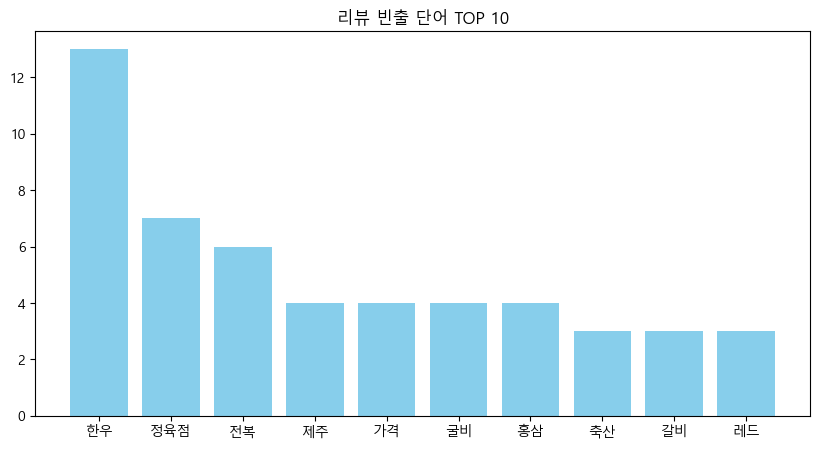

In [6]:
# 2. 빈출 단어 시각화 (막대 그래프)
words_only = [x[0] for x in top_10]
counts_only = [x[1] for x in top_10]

plt.figure(figsize=(10, 5))
plt.bar(words_only, counts_only, color='skyblue')
plt.title('리뷰 빈출 단어 TOP 10')
plt.show()

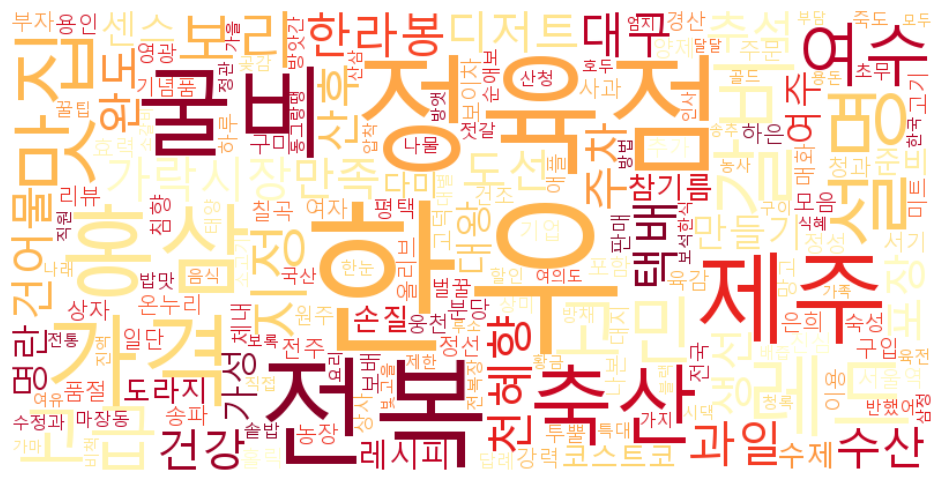

In [8]:
# 3. 워드 클라우드 생성
wc = WordCloud(
    font_path='malgun', # 윈도우 폰트 이름
    background_color='white',
    width=800,
    height=400,
    colormap='YlOrRd'
).generate_from_frequencies(count)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()